# Análisis de precios de un producto

**Objetivo.**
Mediante el uso de las bibliotecas Numpy, Pandas y Matplotlib, realizar un análisis de datos de los precios de un producto y con ello definir el mejor precio de venta para un producto de un nueva compañía. Usando una visualización efectiva, convencer a la junta de socios de que ese es el mejor precio de acuerdo con la competencia y la información que se tiene.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/HeCompA/blob/main/02_DataScience/precios_producto.ipynb">HeCompA - Precios-Producto</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

  **Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

---
* El avance de la tecnología nos provee de herramientas sofisticadas para contar historias con datos.
* Hoy en día es fácil poner datos en una hoja de cálculo, elegir un conjunto de ellos, escoger algunas opciones y presionar un botón para obtener un gráfico.
* Cuando hacemos esto, es posible que nuestra historia brille ¡por su ausencia!
* ¡Las herramientas de software no conocen la historia que quiero contar!

--- 

* Tener la habilidad de contar historias con datos y visualizaciones efectivas, es cada vez más importante con el aumento exponencial de los datos.
* Nos permite tomar decisiones a partir de la información presentada.
* Una visualización efectiva es muy importante, por que los gráficos son posiblemente lo único que verá la audiencia. 
* Visualización: combinación de gráficos, imágenes, animaciones y tablas  para comunicar algo a alguien. 
---

## Ejemplo: Precio al menudeo de un producto

(Con base en: “[Storytelling with data](https://www.storytellingwithdata.com/books)”, Cole Nussbaumer Knaflic, John Wiley & Sons, Inc., Hoboken, New Jersey, 2015. Capítulo 8.)

* Una *startup* ha creado un producto y está analizando cómo ponerle el mejor precio de venta.
* Dos consideraciones importantes en toda startup son:
    - ¿cómo es que los competidores tasan sus productos? y
    - ¿cómo es que este precio ha cambiado con los años?


---

La siguiente tabla muestra los precios de productos de diferentes compañías competidoras desde 2013 y hasta 2019.

|               | 2013 | 2014 | 2015 | 2016 | 2017 | 2018 | 2019 |
|---------------|------|------|------|------|------|------|------|
|**Producto A** | 395  |  420 |  430 |  390 |  300 |  275 |  260 |
|**Producto B** | 370  |  400 |  405 |  380 |  295 |  255 |  245 |
|**Producto C** |      |      |  100 |  180 |  200 |  240 |  182 |
|**Producto D** |      |      |      |  160 |  265 |  215 |  210 |
|**Producto E** |      |      |      |      |      |  100 |  205 |

---
**Misión**

Definir el mejor precio de venta para el producto de la nueva compañía y convencer a la junta de socios de que ese es el mejor precio de acuerdo con la competencia y la información que se tiene.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros para el estilo de las gráficas
params = {'figure.figsize' : (10,5),
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 14,
          'grid.color'     : 'darkgray',
          'grid.linewidth' : 0.5,
          'grid.linestyle' : '--',
          'font.family': 'DejaVu Serif',
         }
plt.rcParams.update(params)

In [3]:
precios = pd.read_excel("Libro1.xlsx", index_col=0)
precios

,2013,2014,2015,2016,2017,2018,2019
Prod A,395.0,420.0,430.0,390.0,300.0,275,260
Prod B,370.0,400.0,405.0,380.0,295.0,255,245
Prod C,NaN,NaN,100.0,180.0,200.0,240,182
Prod D,NaN,NaN,NaN,160.0,265.0,215,210
Prod E,NaN,NaN,NaN,NaN,NaN,100,205


### Una visualización típica

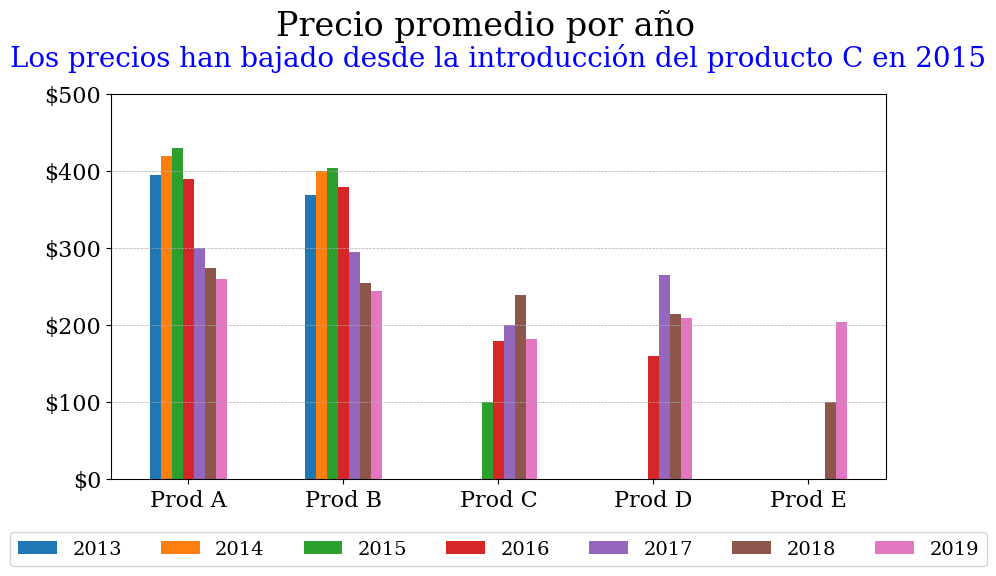

In [5]:
# Visualización 1: barras y colores por año para cada producto

# Utilizamos la función plot() de DataFrame
precios.plot(kind='bar', rot=0)

# Definimos las marcas en el eje y
plt.yticks(ticks=[0,100,200,300,400,500], 
           labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Personalizamos la gráfica con título, subtítulo, leyenda y rejilla.
plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.grid(axis='y')

# Salvamos la gráfica en una imagen y la mostramos
plt.savefig('vis_inicial.png',bbox_inches='tight', dpi=150)
plt.show()

**Observaciones**
* Los productos A y B han estado a la venta desde 2013 a 2019.
* El producto C comenzó su venta en 2015, el D en 2016 y el E en 2018.
* El precio de A y B bajó en 2016, un año después de que entró al mercado el producto C en 2015. Esta observación es importante.


## Construcción de la historia

---
### El contexto: ¿Quién? ¿Qué? ¿Cómo?

- **¿Quién?**
VP (Vice President of product), el que conoce todas las cuestiones técnicas del producto, el que hace la primera decisión para poner el precio. Es a quién se presentará el análisis de los datos.

- **¿Qué?**
Análisis de cómo el precio de los competidores ha cambiado con el tiempo y recomendar un rango de precios.

- **¿Cómo?**
Mostrar un precio promedio al menudeo de los productos A, B, C, D y E para diferentes años.

---
#### La idea central

- Articular un punto de vista único para transmitir lo que está en juego en un solo enunciado. 
- Para nuestro ejemplo diríamos algo como lo siguiente:
    - “Con base en el análisis de precios del mercado y su cambio en el tiempo, para ser competitivos, se recomienda introducir nuestro producto a un precio al menudeo en el rango $P - Q$.”

---
#### La historia en 3 minutos
- Si solo tuvieras tres minutos para contar tu historia con palabras, ¿cómo lo harías?
- Si eres capaz de hacer esto, significa que tienes muy claro lo que deseas contar. 
    - Intenta hacer esto con tu historia.
    - Grábate y escúchate varias veces.
    - Repítelo hasta que sientas que lo has logrado.
- Tanto la idea central como la historia en 3 minutos,  serán de utilidad para la presentación de tu historia.

---
#### El color
- El color puede ayudar a discernir entre valores de datos; pero también puede confundir.
- En esta visualización, los colores distraen del objetivo principal: “mostrar el cambio en los precios a lo largo del tiempo”.
- Entonces, la primera mejora es eliminar el color, vea la siguiente visualización.


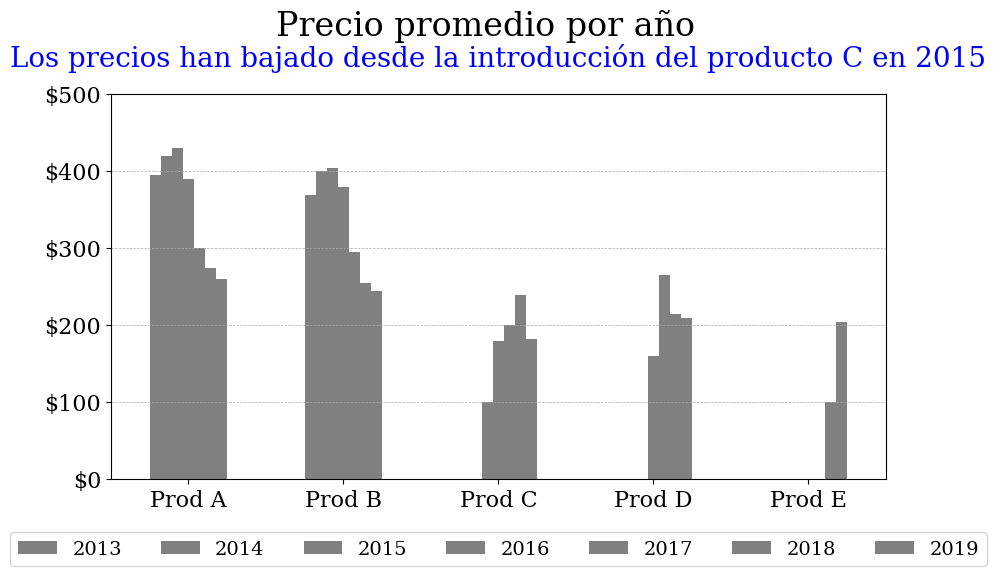

In [6]:
# Visualización 2: eliminamos el color

# En la función plot() de DataFrame definimos el color
precios.plot(kind='bar', rot=0, color='gray')

plt.yticks(ticks=[0,100,200,300,400,500], labels=['\$0','\$100','\$200','\$300','\$400','\$500'])
plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.grid(axis='y')
plt.show()

**Observaciones**
- Efectivamente, el color ya no es un distractor, sin embargo, no se distingue la información por años.
- De acuerdo con el texto de la primera visualización, vamos a resaltar la información a partir del año 2015, que fue cuando se introdujo el producto C y los precios empezaron a bajar.

**Gráfica de barras gris y negro**

<Axes: >

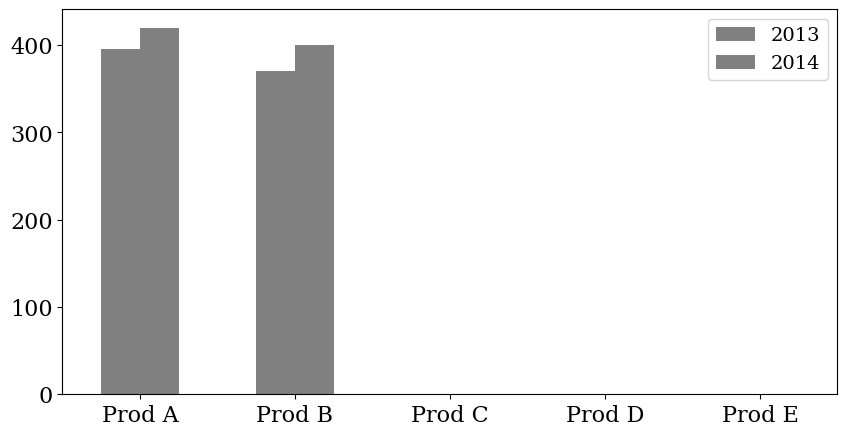

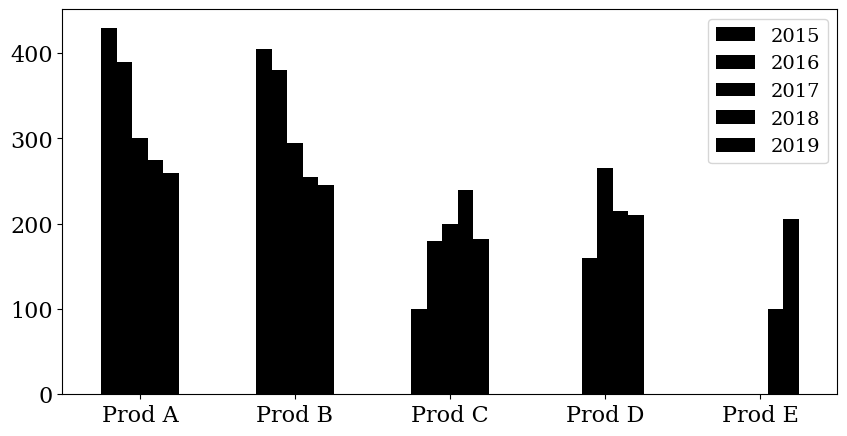

In [7]:
precios.plot(y = [2013, 2014], kind='bar', rot=0, color='gray')
precios.plot(y = [2015, 2016, 2017, 2018, 2019], kind='bar', rot=0, color='k')

**Gráfica de barras gris y negro juntas**

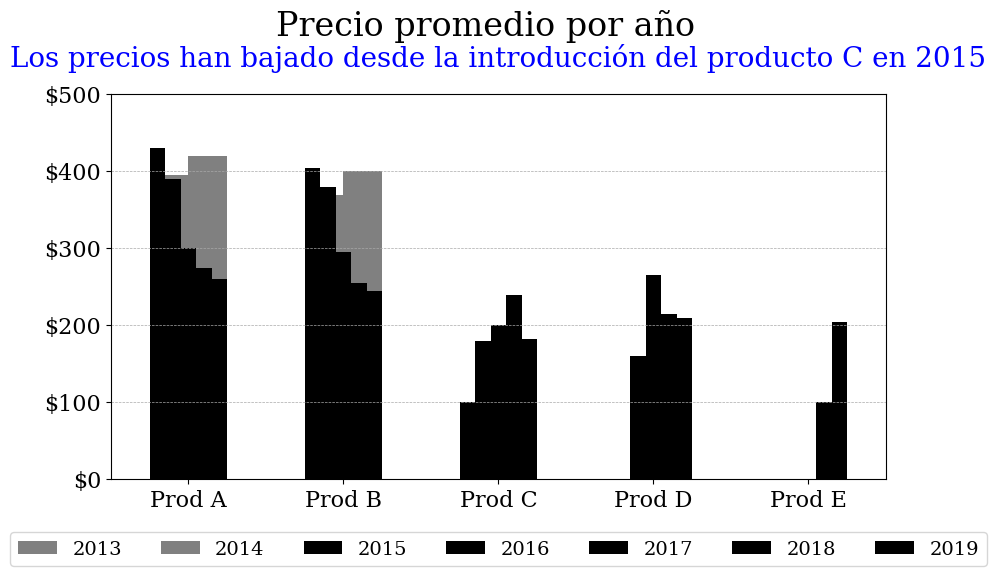

In [8]:
# Juntamos las dos gráficas en una sola
ax1 = precios.plot(y = [2013, 2014], kind='bar', rot=0, color='gray')
precios.plot(y = [2015, 2016, 2017, 2018, 2019], kind='bar', rot=0, color='k', ax = ax1)

plt.yticks(ticks=[0,100,200,300,400,500], labels=['\$0','\$100','\$200','\$300','\$400','\$500'])
plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.grid(axis='y')
plt.show()

**Gráfica de barras gris y negras juntas, recorridas**

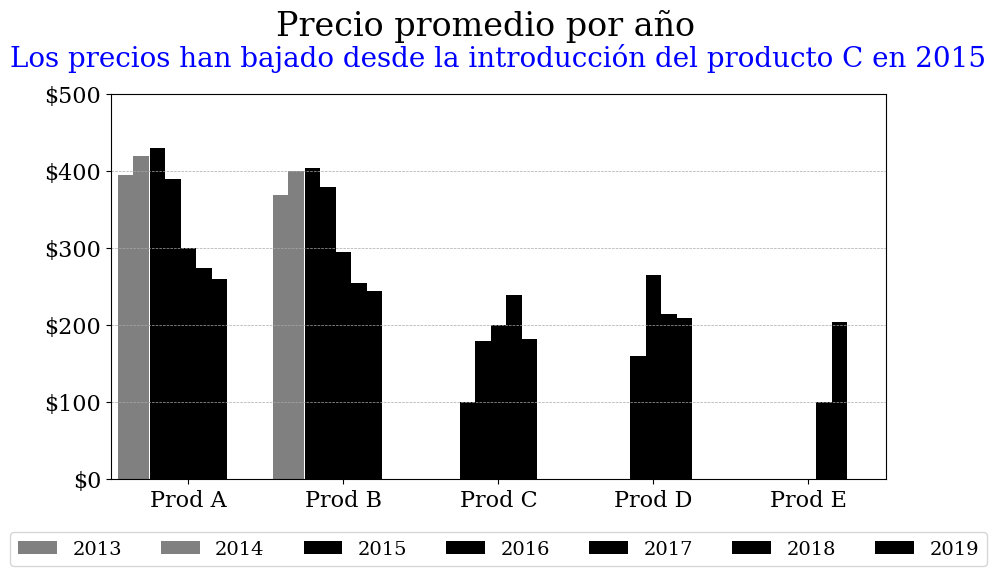

In [9]:
# Visualización 3: resaltamos tendencias

# Juntamos las dos gráficas en una sola y las colocamos una junto a otra
ax1 = precios.plot(y = [2013, 2014], kind='bar', rot=0, color='gray',
                  width=0.2, position=2.28)
precios.plot(y = [2015, 2016, 2017, 2018, 2019], kind='bar', rot=0, color='k', 
             ax = ax1)

plt.yticks(ticks=[0,100,200,300,400,500], labels=['\$0','\$100','\$200','\$300','\$400','\$500'])
plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.grid(axis='y')
plt.show()

**Observaciones**
- Se nota claramente como los precios de A y de B van en declive después de 2015.
- Pero no pasa lo mismo con los productos D y E, que fueron lanzados en años posteriores a C.
- Por lo tanto, el texto en azul de la gráfica, no es correcto. Ese texto debe ser corregido en la visualización final.


---
### Eligiendo la estrategia de visualización 

- Parece que la forma en que se está visualizando la información no es la más adecuada.
- Se desea mostrar cómo cambia un precio a lo largo del tiempo y tratar de encontrar una tendencia.
- Es posible que usar líneas sea lo más adecuado.
- Adicionalmente, las líneas eliminan el efecto de escalera que se ve en las barras.

**Gráfica de líneas con DataFrame**

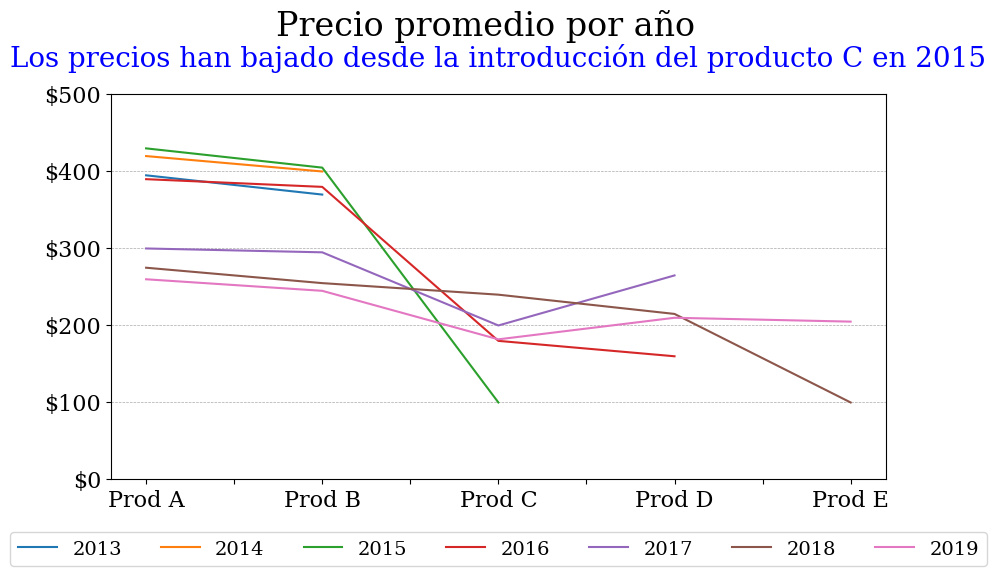

In [10]:
precios.plot(kind='line', rot=0)

plt.yticks(ticks=[0,100,200,300,400,500], 
           labels=['\$0','\$100','\$200','\$300','\$400','\$500'])
plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=7)
plt.grid(axis='y')
plt.show()

Observa que las líneas, como se graficaron antes, no dan mucha información y por le contrario se ve todo enmarañado. 

Vamos a usar Matplotlib en lo que sigue para tener acceso a más funcionalidades.

#### Líneas por cada producto

Primero arreglamos los datos por producto (renglones del DataFrame)

In [13]:
A = np.array(precios.iloc[0])
B = np.array(precios.iloc[1])
C = np.array(precios.iloc[2])
D = np.array(precios.iloc[3])
E = np.array(precios.iloc[4])
print(A)
print(B)
print(C)
print(D)
print(E)

[395. 420. 430. 390. 300. 275. 260.]
[370. 400. 405. 380. 295. 255. 245.]
[ nan  nan 100. 180. 200. 240. 182.]
[ nan  nan  nan 160. 265. 215. 210.]
[ nan  nan  nan  nan  nan 100. 205.]


In [14]:
# Arreglo para usarse en el eje x
x = np.array([i for i in range(7)])
print('\nx: ',x)


x:  [0 1 2 3 4 5 6]


**Graficamos barras y líneas**

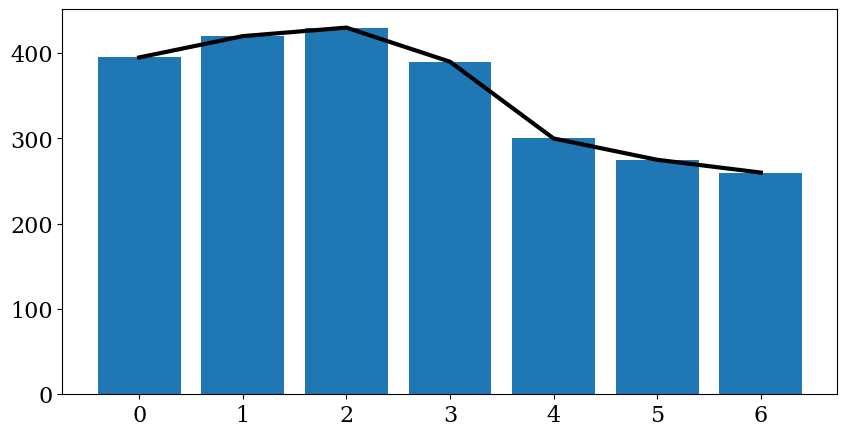

In [28]:
# Un primer intento
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.bar(x, A)
ax.plot(x, A, lw=3, c='k')

plt.show()

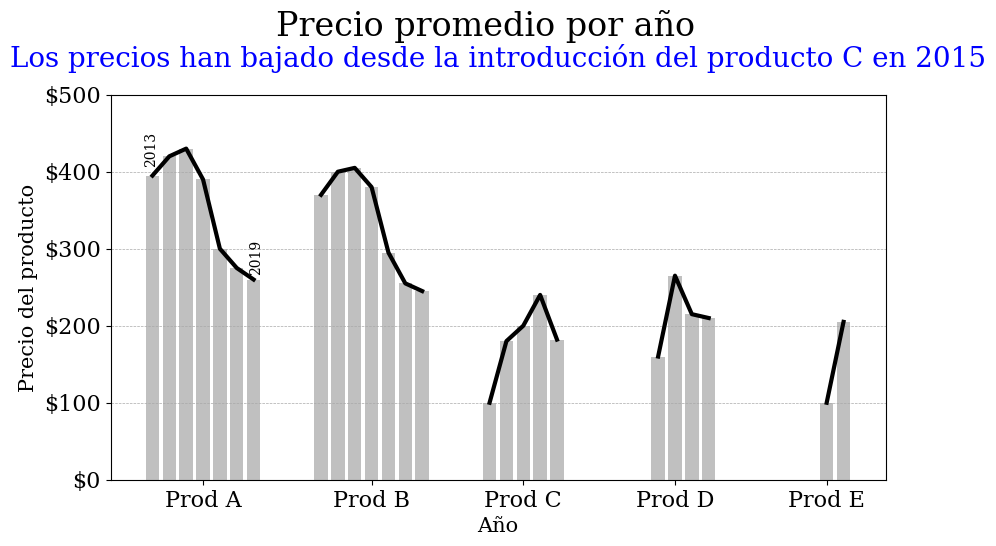

In [29]:
# Visualización 4: usamos barras y líneas
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

offset = 10 # Este número nos ayudará a recorrer las gráficas

# Producto A
ax.bar(x, A, color='silver')
ax.plot(x, A, lw=3, c='k')
ax.text(-0.5,410,'2013', fontsize=10, color='k', rotation='vertical')
ax.text(5.75,270,'2019', fontsize=10, color='k', rotation='vertical')

# Producto B
ax.bar(x+offset, B, color='silver')
ax.plot(x+offset, B, lw=3, c='k')

# Producto C
ax.bar(x+2*offset-2, C, color='silver')
ax.plot(x+2*offset-2, C, lw=3, c='k')

# Producto D
ax.bar(x+3*offset-3, D, color='silver')
ax.plot(x+3*offset-3, D, lw=3, c='k')

# Producto E
ax.bar(x+4*offset-5, E, color='silver')
ax.plot(x+4*offset-5, E, lw=3, c='k')

# Etiquetas de los ejes
ax.set_ylabel('Precio del producto', fontsize=15)
ax.set_xlabel('Año', fontsize=15)

# Marcas sobre los ejes
ax.set_xticks(ticks=[3, offset+3, 2*offset+2, 3*offset+1, 4*offset], 
              labels=['Prod A', 'Prod B', 'Prod C', 'Prod D', 'Prod E'])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla en el eje y
ax.grid(axis='y')

plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observaciones**

- Se usa el mismo diseño (ejes, límites, título, …)
- Esta visualización permite ver con más claridad lo que sucede con el precio de cada producto a lo largo del tiempo.
- Aunque es difícil comparar entre productos.
- Si graficamos en un mismo eje $x$ todos los productos obtenemos algo mejor.

#### Líneas en un mismo eje.

In [30]:
x2 = np.arange(2013,2020,1)
x2

array([2013, 2014, 2015, 2016, 2017, 2018, 2019])

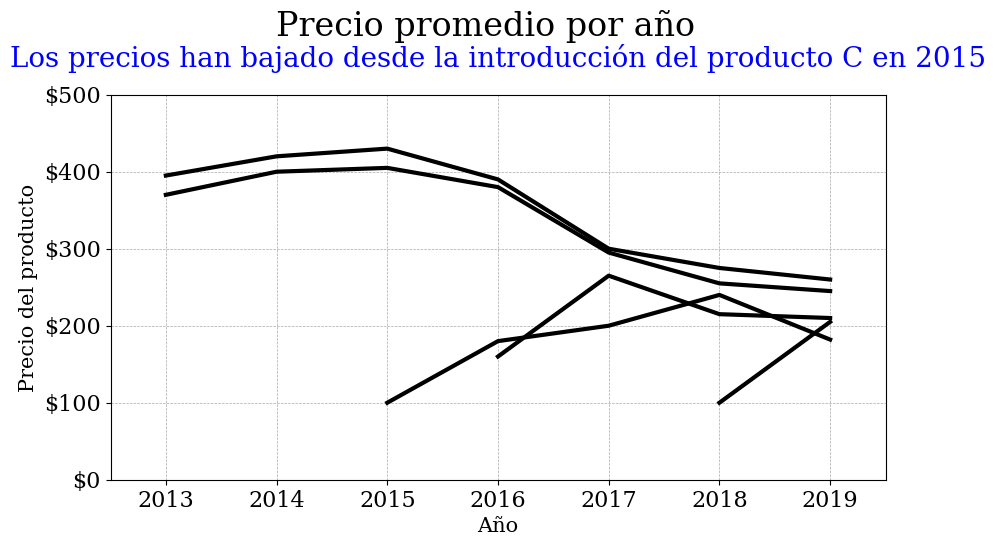

In [31]:
# Visualización 5: usamos solo líneas 
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, c='k')

# Producto B
ax.plot(x2, B, lw=3, c='k')

# Producto C
ax.plot(x2, C, lw=3, c='k')

# Producto D
ax.plot(x2, D, lw=3, c='k')

# Producto E
ax.plot(x2, E, lw=3, c='k')

# Etiquetas de los ejes
ax.set_ylabel('Precio del producto', fontsize=15)
ax.set_xlabel('Año', fontsize=15)

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla 
ax.grid()

plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observaciones**
- Obsérvese que se reduce el desorden y se evita la repetición de etiquetas en las gráficas.
- Quizá ahora podamos agregar color (el cual habíamos eliminado antes) para identificar cada producto.


#### Líneas con color

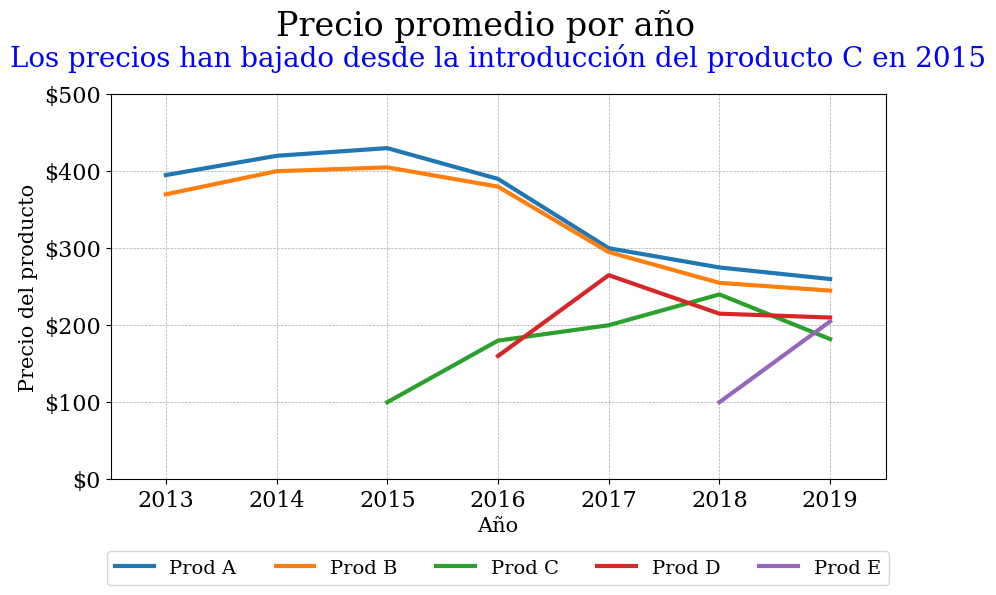

In [32]:
# Visualización 6: usamos líneas con color
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, label='Prod A')

# Producto B
ax.plot(x2, B, lw=3, label='Prod B')

# Producto C
ax.plot(x2, C, lw=3, label='Prod C')

# Producto D
ax.plot(x2, D, lw=3, label='Prod D')

# Producto E
ax.plot(x2, E, lw=3, label='Prod E')

# Etiquetas de los ejes
ax.set_ylabel('Precio del producto', fontsize=15)
ax.set_xlabel('Año', fontsize=15)

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla 
ax.grid()

plt.title('Los precios han bajado desde la introducción del producto C en 2015', c='blue', y=1.05)
plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=7)
plt.show()

---
### Eliminando el desorden

- Significa eliminar lo que no aporta información. En nuestro ejemplo podemos hacer lo siguiente:
    - Quitar protagonismo al título, debe estar, pero no debe distraer del objetivo principal; en este caso no necesita estar en texto resaltado (bold).
    - Eliminar los bordes de la gráfica y la rejilla.
    - Quitar protagonismo a los ejes y sus etiquetas haciéndolas más tenues. 
    - En este caso no es necesario poner la etiqueta a cada eje, pues de la información se deduce de que se trata.
    - Eliminar el color otra vez; se puede usar de manera estratégica; más adelante se verá cómo.
    - Etiquetar las líneas directamente. Esto evita el trabajo visual de la audiencia: ya no tiene que ver primero la leyenda, luego buscar en el gráfico la curva que corresponda, y esto varias veces hasta entender lo que se muestra.




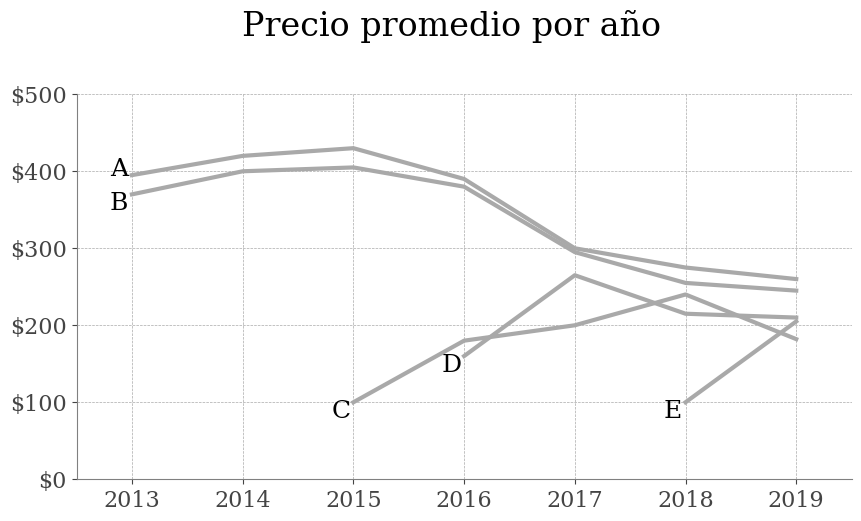

In [33]:
# Visualización 7: eliminamos elementos que solo distraen
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, c='darkgray')

# Producto B
ax.plot(x2, B, lw=3, c='darkgray')

# Producto C
ax.plot(x2, C, lw=3, c='darkgray')

# Producto D
ax.plot(x2, D, lw=3, c='darkgray')

# Producto E
ax.plot(x2, E, lw=3, c='darkgray')

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla 
ax.grid()

# Etiquetado de cada línea
ax.text(x = x2[0]-0.20, y = A[0], s = 'A', fontsize = 18)
ax.text(x = x2[0]-0.20, y = B[0]-20, s = 'B', fontsize = 18)
ax.text(x = x2[2]-0.20, y = C[2]-20, s = 'C', fontsize = 18)
ax.text(x = x2[3]-0.20, y = D[3]-20, s = 'D', fontsize = 18)
ax.text(x = x2[5]-0.20, y = E[5]-20, s = 'E', fontsize = 18)

# Eliminación de algunas líneas del recuadro
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Color de los ticks
ax.tick_params(axis='x', colors='#444444')
ax.tick_params(axis='y', colors='#444444')

plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observaciones.**
- Para el objetivo planteado, esta gráfica muestra claramente la tendencia de los precios de los productos A, B, C , D y E a lo largo del tiempo.
- Hemos eliminado información que es irrelevante para ese objetivo.
- Esta visualización se puede usar como un lienzo para posteriormente resaltar algunas cosas de interés.


---
### Enfocar la atención: *preattentive features*
- Finalmente llegamos a un punto interesante: enfocar la atención de la audiencia en puntos relevantes mediante el uso estratégico de algunas *preattentive features*.
- Consideremos el texto de la visualización inicial: 
    - **“Los precios han bajado desde la introducción del producto C in 2010.”** 
    - Este texto se cambiará por: **“Después del lanzamiento del producto C en 2015, el precio promedio al menudeo de los productos existentes ha disminuido.”** Este último es más correcto que el primero.
- ¿Cómo se puede demostrar la validez de este último texto usando *preattentive features*?

#### Color y marcadores

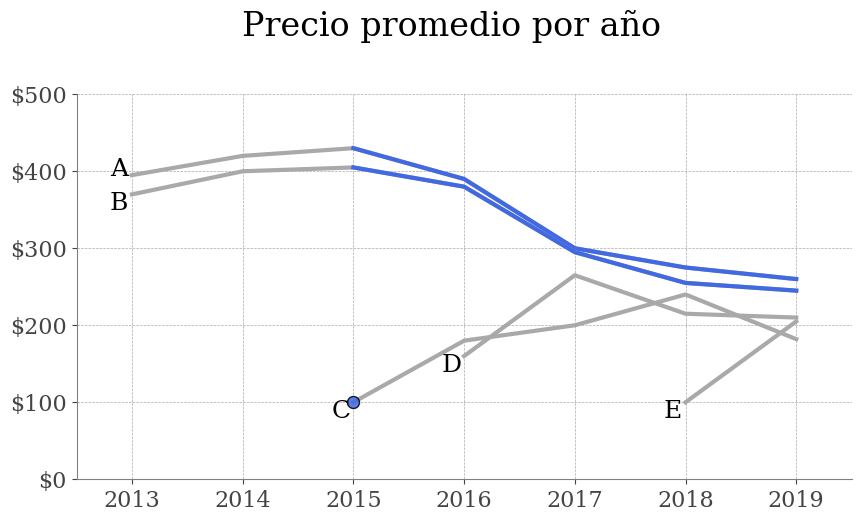

In [34]:
# Visualización 8: enfocamos la atención en el descenso
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, c='darkgray')
ax.plot(x2[2:], A[2:], lw=3, color='royalblue')

# Producto B
ax.plot(x2, B, lw=3, c='darkgray')
plt.plot(x2[2:], B[2:], lw=3, color='royalblue')

# Producto C
ax.plot(x2, C, lw=3, c='darkgray')
ax.scatter(x2[2], C[2], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Producto D
ax.plot(x2, D, lw=3, c='darkgray')

# Producto E
ax.plot(x2, E, lw=3, c='darkgray')

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla 
ax.grid()

# Etiquetado de cada línea
ax.text(x = x2[0]-0.20, y = A[0], s = 'A', fontsize = 18)
ax.text(x = x2[0]-0.20, y = B[0]-20, s = 'B', fontsize = 18)
ax.text(x = x2[2]-0.20, y = C[2]-20, s = 'C', fontsize = 18)
ax.text(x = x2[3]-0.20, y = D[3]-20, s = 'D', fontsize = 18)
ax.text(x = x2[5]-0.20, y = E[5]-20, s = 'E', fontsize = 18)

# Eliminación de algunas líneas del recuadro
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Color de los ticks
ax.tick_params(axis='x', colors='#444444')
ax.tick_params(axis='y', colors='#444444')

plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observaciones.**

- En esta última visualización estamos enfocando la atención del público usando un color sobre las gráficas de los productos A y B: se resalta el descenso del precio.
- Adicionalmente, se agrega un marcador con el mismo color en el inicio de la curva del producto C, para indicar cuando se introdujo. 
- Se ve claramente el inicio de C y qué pasó con A y B posterior a eso.
- Se usa el color de manera consistente.


#### Subida y bajada del precio

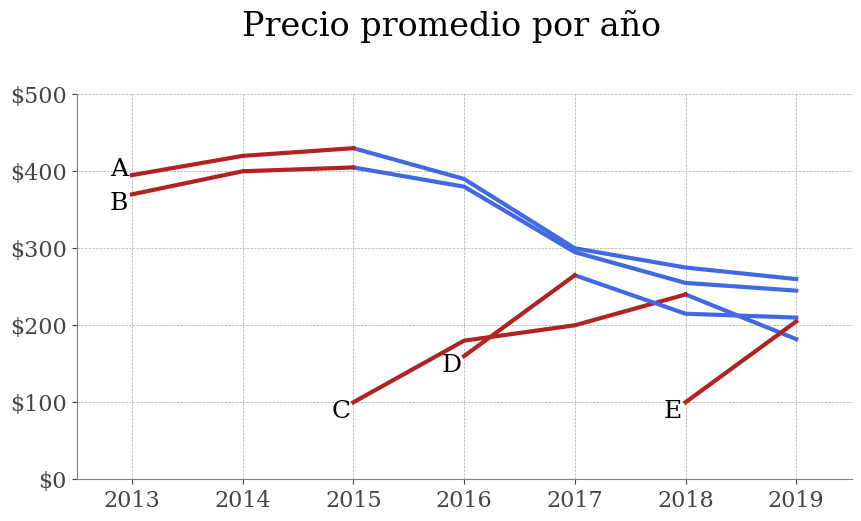

In [38]:
# Visualización 9: enfocamos la atención en el ascenso y descenso
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2[2:], A[2:], lw=3, color='royalblue')
ax.plot(x2[0:3], A[0:3], lw=3, color='firebrick')

# Producto B
ax.plot(x2[2:], B[2:], lw=3, color='royalblue')
ax.plot(x2[0:3], B[0:3], lw=3, color='firebrick')

# Producto C
ax.plot(x2[5:], C[5:], lw=3, color='royalblue')
ax.plot(x2[2:6], C[2:6], lw=3, color='firebrick')

# Producto D
ax.plot(x2[4:], D[4:], lw=3, color='royalblue')
ax.plot(x2[3:5], D[3:5], lw=3, color='firebrick')

# Producto E
ax.plot(x2, E, lw=3, c='firebrick')

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla
ax.grid()

# Etiquetado de cada línea
ax.text(x = x2[0]-0.20, y = A[0], s = 'A', fontsize = 18)
ax.text(x = x2[0]-0.20, y = B[0]-20, s = 'B', fontsize = 18)
ax.text(x = x2[2]-0.20, y = C[2]-20, s = 'C', fontsize = 18)
ax.text(x = x2[3]-0.20, y = D[3]-20, s = 'D', fontsize = 18)
ax.text(x = x2[5]-0.20, y = E[5]-20, s = 'E', fontsize = 18)

# Eliminación de algunas líneas del recuadro
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Color de los ticks
ax.tick_params(axis='x', colors='#444444')
ax.tick_params(axis='y', colors='#444444')

plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observaciones.**

En esta gráfica se muestra que usando la misma estrategia, se puede resaltar el hecho de que: con el lanzamiento de un nuevo producto, es típico ver un ascenso inicial (parte roja) del precio promedio al menudeo, seguido de un descenso (parte azul).


#### Precio final

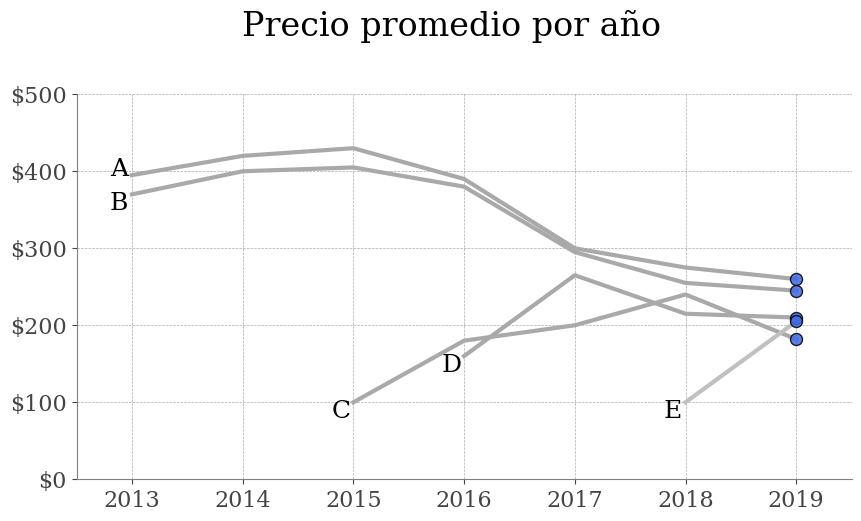

In [39]:
# Visualización 10: marcamos los precios finales
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, c='darkgray')
ax.scatter(x2[-1], A[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Producto B
ax.plot(x2, B, lw=3, c='darkgray')
ax.scatter(x2[-1], B[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Producto C
ax.plot(x2, C, lw=3, c='darkgray')
ax.scatter(x2[-1], C[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Producto D
ax.plot(x2, D, lw=3, c='darkgray')
ax.scatter(x2[-1], D[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Producto E
ax.plot(x2, E, lw=3, c='silver')
ax.scatter(x2[-1], E[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='royalblue')

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla
ax.grid()

# Etiquetado de cada línea
ax.text(x = x2[0]-0.20, y = A[0], s = 'A', fontsize = 18)
ax.text(x = x2[0]-0.20, y = B[0]-20, s = 'B', fontsize = 18)
ax.text(x = x2[2]-0.20, y = C[2]-20, s = 'C', fontsize = 18)
ax.text(x = x2[3]-0.20, y = D[3]-20, s = 'D', fontsize = 18)
ax.text(x = x2[5]-0.20, y = E[5]-20, s = 'E', fontsize = 18)

# Eliminación de algunas líneas del recuadro
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Color de los ticks
ax.tick_params(axis='x', colors='#444444')
ax.tick_params(axis='y', colors='#444444')

plt.suptitle('Precio promedio por año', fontsize=24, y=1.05)
plt.show()

**Observación**

- En esta gráfica se muestra que: en 2019, los precios de todos los productos al menudeo convergen
al intervalo de  $[180, 260]$ con un promedio de $220$.
- Quizá sea necesario agregar estos números en el gráfico para mayor claridad.
- Se usan marcadores y colores para llevar nuestra atención hacia los precios finales.



### Pensar como diseñador

- Durante todo el proceso hemos estado pensando como diseñadores, pensando en los colores, las líneas, los marcadores y toda la decoración de la gráfica, y cómo resaltar lo que es importante.
- Se puede hacer un poco más:
    - Agregar textos simples a los ejes. Se debe tener cuidado con el uso de mayúsculas, solo poner mayúscula la primera letra de un título.
    - Alinear cada elemento, en este caso, los títulos.
- Además, vamos a agregar una región donde se recomienda debe estar el precio de lanzamiento de nuestro producto.

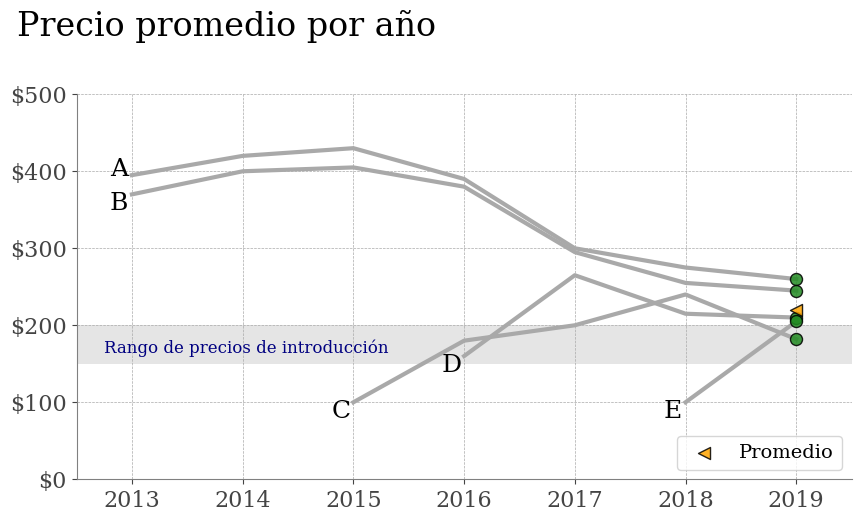

In [40]:
# Visualización 11: marcamos el rango de precios de introducción
fig = plt.figure() # Se define una figura
ax = fig.gca()     # Se obtienen los ejes de la figura

# Producto A
ax.plot(x2, A, lw=3, c='darkgray')
ax.scatter(x2[-1], A[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='forestgreen')

# Producto B
ax.plot(x2, B, lw=3, c='darkgray')
ax.scatter(x2[-1], B[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='forestgreen')

# Producto C
ax.plot(x2, C, lw=3, c='darkgray')
ax.scatter(x2[-1], C[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='forestgreen')

# Producto D
ax.plot(x2, D, lw=3, c='darkgray')
ax.scatter(x2[-1], D[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='forestgreen')

# Producto E
ax.plot(x2, E, lw=3, c='darkgray')
ax.scatter(x2[-1], E[-1], marker='o', alpha=0.85, ec = 'k', s=75, zorder=5, color='forestgreen')

# Promedio final
precios_finales = np.array([A[-1], B[-1], C[-1], D[-1], E[-1],])
promedio_final = np.mean(precios_finales)
ax.scatter(x2[-1], promedio_final, marker='<', alpha=0.85, ec = 'k', s=75, 
           zorder=5, color='orange', label='Promedio')

# Límites en los ejes
ax.set_ylim(0,500)
ax.set_xlim(2012.5,2019.5)

# Marcas sobre los ejes
ax.set_xticks(ticks=[i for i in range(2013,2020)])
ax.set_yticks(ticks=[0,100,200,300,400,500], 
              labels=['\$0','\$100','\$200','\$300','\$400','\$500'])

# Rejilla
ax.grid()

# Etiquetado de cada línea
ax.text(x = x2[0]-0.20, y = A[0], s = 'A', fontsize = 18)
ax.text(x = x2[0]-0.20, y = B[0]-20, s = 'B', fontsize = 18)
ax.text(x = x2[2]-0.20, y = C[2]-20, s = 'C', fontsize = 18)
ax.text(x = x2[3]-0.20, y = D[3]-20, s = 'D', fontsize = 18)
ax.text(x = x2[5]-0.20, y = E[5]-20, s = 'E', fontsize = 18)

# Eliminación de algunas líneas del recuadro
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

# Color de los ticks
ax.tick_params(axis='x', colors='#444444')
ax.tick_params(axis='y', colors='#444444')

# Recuadro para indicar la región del precio final
left, bottom, width, height = (2012, 150, 8, 50)
rect = plt.Rectangle((left, bottom), width, height,
                     facecolor="black", alpha=0.1)
ax.add_patch(rect)
ax.text(x = x2[0]-0.25, y = 165, s = 'Rango de precios de introducción', fontsize = 12, color='navy')

plt.suptitle('Precio promedio por año', fontsize=24, x =0.275, y=1.05)
plt.legend(loc='lower right')
plt.savefig('vis_final.png',bbox_inches='tight', dpi=150)
plt.show()